In [65]:
import os
import json

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
#with open("/home/tim/repos/dynamic-topic-modeling/data/topic_extraction/llama/llama3-chat-prompt-topic-3kw-ami.json") as f:
#    data = json.load(f)
with open("/home/tim/repos/dynamic-topic-modeling/data/topic_extraction/hermes_llama/hermes_llama3-chat-prompt-topic-5kw-icsi.json") as f:
    data = json.load(f)

In [67]:
data

{'data': [{'key_words': ['agenda',
    ' field trip',
    ' French test data',
    ' features',
    ' cube'],
   'topic_id': 0,
   'dialogue_id': 0},
  {'key_words': ['timit', 'Neural Network', 'Cube', 'PLP', 'HTK'],
   'topic_id': 1,
   'dialogue_id': 0},
  {'key_words': ['corpus', ' digits', ' Aurora', ' Spanish', ' French'],
   'topic_id': 2,
   'dialogue_id': 0},
  {'key_words': ['training',
    ' combinations',
    ' testing',
    ' HTK model',
    ' machines.'],
   'topic_id': 3,
   'dialogue_id': 0},
  {'key_words': ['', '', '', '', ''], 'topic_id': 4, 'dialogue_id': 0},
  {'key_words': ['channel',
    ' microphone',
    ' channel number',
    ' camera',
    ' gain.'],
   'topic_id': 0,
   'dialogue_id': 1},
  {'key_words': ['copy',
    ' reciprocal',
    ' recognition',
    ' automatic',
    ' segmentations.'],
   'topic_id': 1,
   'dialogue_id': 1},
  {'key_words': ['transcribers',
    'segment',
    'transcription',
    'meeting',
    'approve'],
   'topic_id': 2,
   'dialogu

In [73]:
dialogues = []
topics = []
cur_dial = 0
for item in data['data']:
    if item['dialogue_id'] != cur_dial:
        dialogues.append({"topics": topics,
                          "dialogue_id": item['dialogue_id']})
        topics = []
        cur_dial =  item['dialogue_id']
    cur_kws = item['key_words']
    cur_kws = [kw.replace("*", "") for kw in cur_kws]
    cur_kws = [kw.split(":")[0] for kw in cur_kws]
    cur_kws = [kw.split("(")[0] for kw in cur_kws]
    cur_kws = [kw.split(" - ")[0] for kw in cur_kws]
    cur_kws = [kw for kw in cur_kws if kw!= ""]
    if len(cur_kws) != 0:
        topics.append(cur_kws)

In [5]:
"""
cur_dial = {'topics': [['Remote', 'Design', 'Requirements'],
  ['Remote', 'Design', 'User experience'],
  ['User experience', 'Design', 'Energy Source'],
  ['Simplicity', 'Design', 'Television'],
  ['Design', 'Tehnology', 'Television'],
  ['Tehnology', 'Design', 'Requirements']],
 'dialogue_id': 1}
"""

"\ncur_dial = {'topics': [['Remote', 'Design', 'Requirements'],\n  ['Remote', 'Design', 'User experience'],\n  ['User experience', 'Design', 'Energy Source'],\n  ['Simplicity', 'Design', 'Television'],\n  ['Design', 'Tehnology', 'Television'],\n  ['Tehnology', 'Design', 'Requirements']],\n 'dialogue_id': 1}\n"

In [74]:
dialogues

[{'topics': [['agenda',
    ' field trip',
    ' French test data',
    ' features',
    ' cube'],
   ['timit', 'Neural Network', 'Cube', 'PLP', 'HTK'],
   ['corpus', ' digits', ' Aurora', ' Spanish', ' French'],
   ['training', ' combinations', ' testing', ' HTK model', ' machines.']],
  'dialogue_id': 1},
 {'topics': [['channel',
    ' microphone',
    ' channel number',
    ' camera',
    ' gain.'],
   ['copy', ' reciprocal', ' recognition', ' automatic', ' segmentations.'],
   ['transcribers', 'segment', 'transcription', 'meeting', 'approve']],
  'dialogue_id': 2},
 {'topics': [['wireless',
    'Agenda',
    'Digits',
    'Forced alignment',
    'Conference call'],
   ['far-field microphone',
    'Acoustics',
    'Speech recognition',
    'Forced alignment',
    'Improving alignments'],
   ["t system. and the real test of whether it's important or not",
    ' is to see whether it still holds when you put it in a good system. So',
    ' you know',
    ' the',
    ' uh'],
   ['aurora

In [75]:
uniqique_topics = []
for cur_dial in dialogues:
    for tm in cur_dial['topics']:
        for i in tm:
            uniqique_topics.append(i)

In [76]:
topic_list = []
timestamps = 0
for cur_dial in dialogues:
    for tm in cur_dial['topics']:
        cur_topic_list = [0] * len(uniqique_topics)
        for i in tm:
            cur_topic_list[uniqique_topics.index(i)] += 1
        topic_list.append(cur_topic_list)
        timestamps += 1
    
time = range(timestamps)
topic_list_T = np.transpose(topic_list).tolist()

In [107]:
filtered_topic_list_T = []
filtered_topic_list_T_names = []
for idx in range(len(topic_list_T)):
    if sum(topic_list_T[idx]) > 7:
        filtered_topic_list_T.append(topic_list_T[idx])
        filtered_topic_list_T_names.append(uniqique_topics[idx])

In [108]:
filtered_topic_list = np.transpose(filtered_topic_list_T).tolist()
len(filtered_topic_list)

261

In [109]:
step_range = 50
new_filtered_topic_list_T = []
merged_filtered_topic_list = np.add.reduceat(filtered_topic_list, np.arange(0, len(filtered_topic_list), 50))

merged_filtered_topic_list_T = np.transpose(merged_filtered_topic_list).tolist()

time = range(len(merged_filtered_topic_list_T[0]))

In [112]:
merged_filtered_topic_list_T = merged_filtered_topic_list_T[0:-1]
merged_filtered_topic_list_T

[[4, 3, 1, 0, 0, 0],
 [4, 2, 1, 0, 1, 0],
 [2, 1, 0, 2, 2, 1],
 [1, 0, 0, 1, 6, 1],
 [1, 0, 0, 0, 5, 2],
 [0, 1, 1, 1, 4, 1],
 [0, 0, 1, 0, 5, 2],
 [0, 0, 0, 0, 7, 1]]

In [ ]:
merged_filtered_topic_list_T

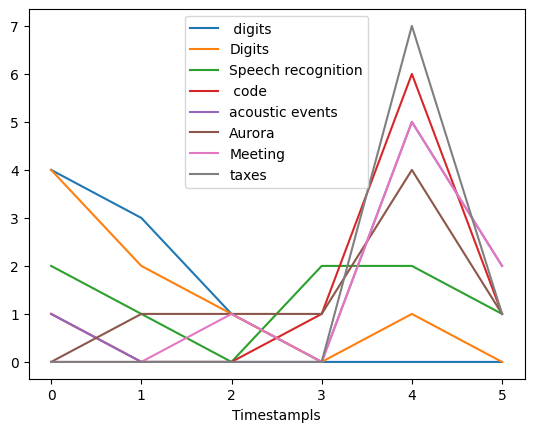

In [113]:
for idx, item in enumerate(merged_filtered_topic_list_T):     
    plt.plot(time, item, label=filtered_topic_list_T_names[idx])

plt.xlabel("Timestampls")
plt.legend()
plt.show();